A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Seventh round of experiments after adjustment of camera apertues and focus.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Image size: 1920 x 1200 pixels
Image buffer size: 36864000 bytes
Bits per pixel: 2
Color Format: SinkFormats.Y16
Frame Rate: 33
Brightness current Value: 0
Contrast current Value: 0
Sharpness current Value: 0
Gamma current Value: 100
Gain current Value: 4.300000190734863
Gain current Auto: 0


In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 302.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 64.39238410596026 x 60.4 = 3889.2999999999997
Exposure set to 0.12878400087356567 (err of 7.734553031102376e-07
Trial 1:
Imaging with Exposure: 0.12878400087356567 s
+Good exposure 0.12878400087356567 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.12878400087356567
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.02446799911558628 (err of 9.610503911954005e-07
Trial 2:
Imaging with Exposure: 0.02446799911558628 s
+Good exposure 0.02446799911558628 Image recieved
Quantile: 3701.0, Target: 3889.2999999999997
Exposure current Value: 0.02446799911558628
Expected new quant

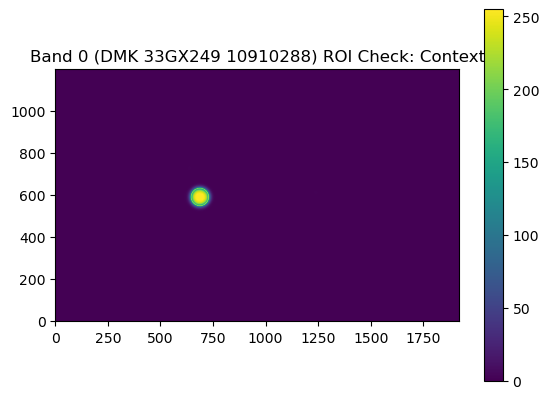

Imaging with Exposure: 0.02571200020611286 s
+Good exposure 0.02571200020611286 Image recieved


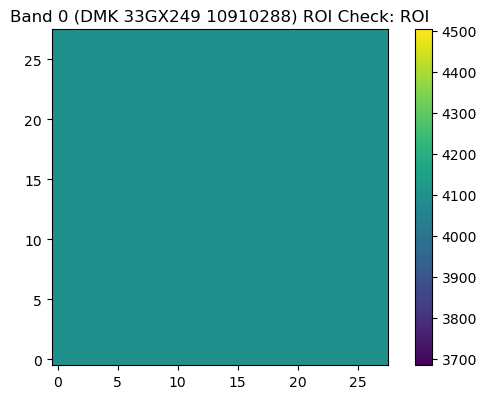

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 432.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 9.003009259259258 x 432.0 = 3889.2999999999993
Exposure set to 0.01800600066781044 (err of 1.8705948064828837e-08
Trial 1:
Imaging with Exposure: 0.01800600066781044 s
+Good exposure 0.01800600066781044 Image recieved
Quantile: 3905.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.01800600066781044
Imaging with Exposure: 0.01800600066781044 s
+Good exposure 0.01800600066781044 Image recieved
x: 258
y: 680


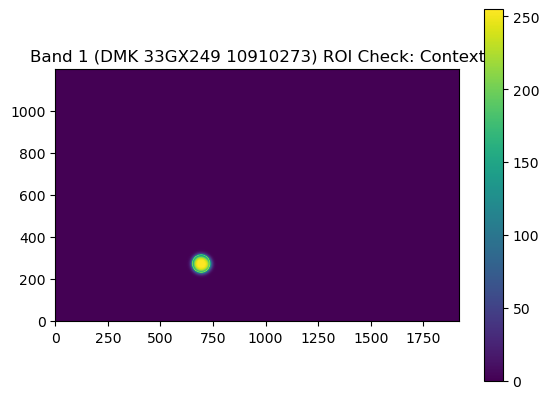

Imaging with Exposure: 0.01800600066781044 s
+Good exposure 0.01800600066781044 Image recieved


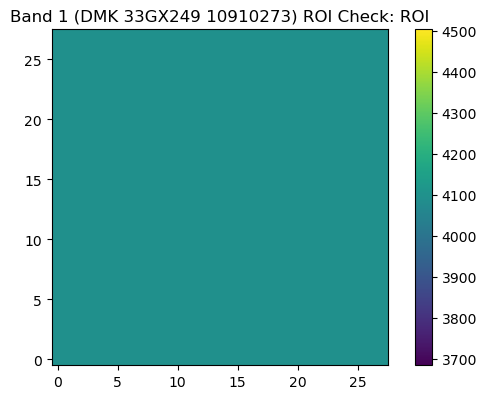

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 79.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 246.15822784810123 x 15.8 = 3889.2999999999997
Exposure set to 0.49231600761413574 (err of 4.7146584358781496e-07
Trial 1:
Imaging with Exposure: 0.49231600761413574 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.49231600761413574 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.49231600761413574
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.0935399979352951 (err of 4.3511390671047145e-08
Trial 2:
I

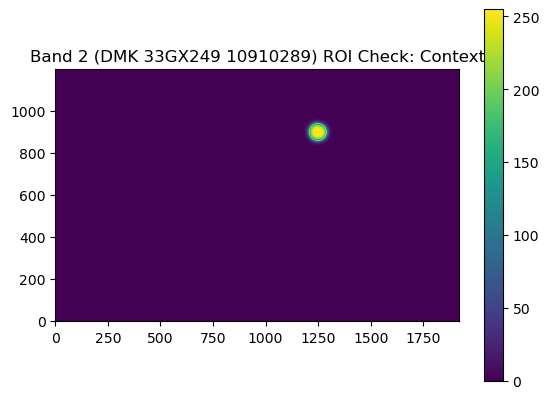

Imaging with Exposure: 0.09840500354766846 s
+Good exposure 0.09840500354766846 Image recieved


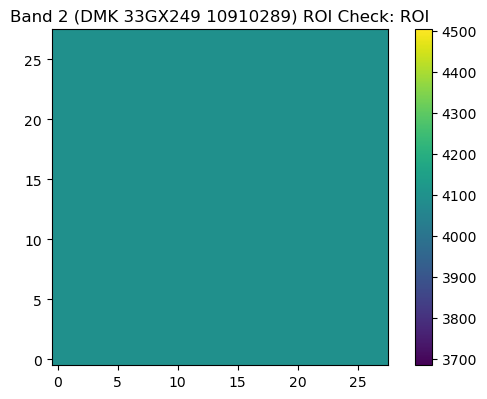

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1611.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.4142147734326502 x 1611.0 = 3889.2999999999997
Exposure set to 0.004827999975532293 (err of 4.298006711046451e-07
Trial 1:
Imaging with Exposure: 0.004827999975532293 s
+Good exposure 0.004827999975532293 Image recieved
Quantile: 3879.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.004827999975532293
Imaging with Exposure: 0.004827999975532293 s
+Good exposure 0.004827999975532293 Image recieved
x: 266
y: 972


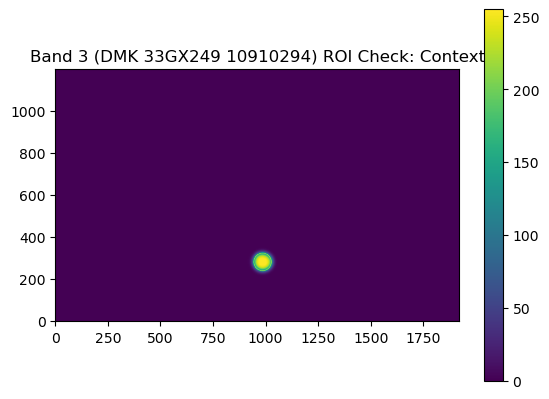

Imaging with Exposure: 0.004827999975532293 s
+Good exposure 0.004827999975532293 Image recieved


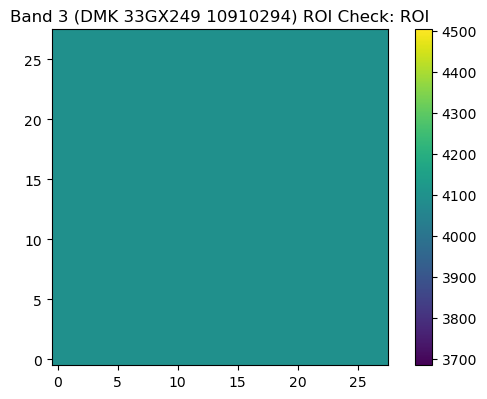

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2974.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.3077673167451243 x 2974.0 = 3889.2999999999997
Exposure set to 0.0026149998884648085 (err of 5.348692566687664e-07
Trial 1:
Imaging with Exposure: 0.0026149998884648085 s
+Good exposure 0.0026149998884648085 Image recieved
Quantile: 3872.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.0026149998884648085
Imaging with Exposure: 0.0026149998884648085 s
+Good exposure 0.0026149998884648085 Image recieved
x: 588
y: 1222


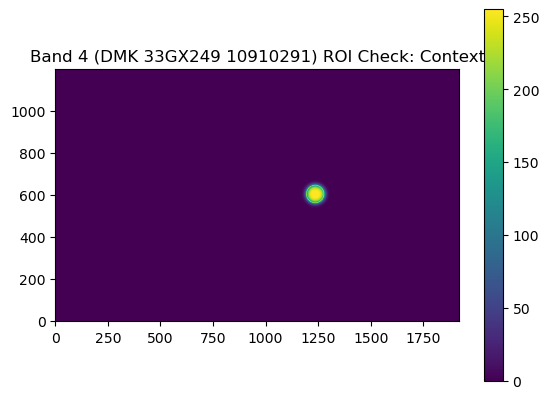

Imaging with Exposure: 0.0026149998884648085 s
+Good exposure 0.0026149998884648085 Image recieved


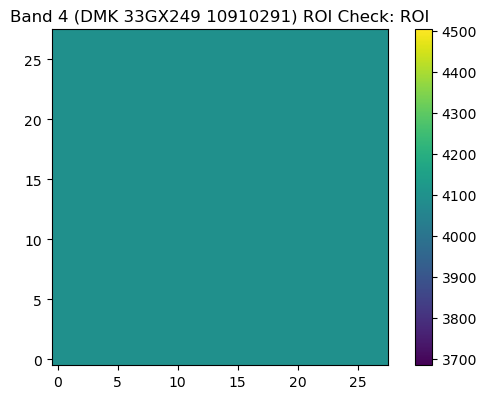

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 60.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 324.1083333333333 x 12.0 = 3889.2999999999993
Exposure set to 0.6482160091400146 (err of 6.883152915415636e-07
Trial 1:
Imaging with Exposure: 0.6482160091400146 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.6482160091400146 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.6482160091400146
Expected new quantile: 0.18999999999999997 x 20470.0 = 3889.2999999999993
Exposure set to 0.12316100299358368 (err of 3.8743019084575003e-08
Trial 2:
Imagin

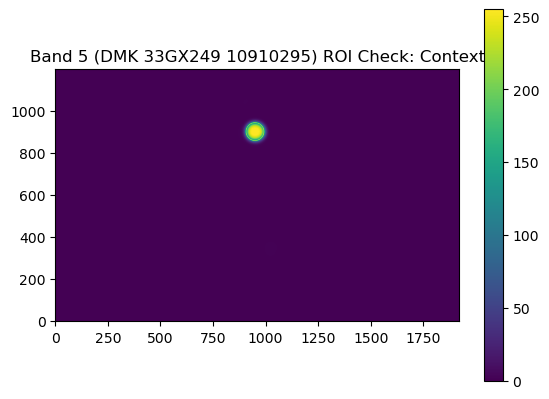

Imaging with Exposure: 0.12960200011730194 s
+Good exposure 0.12960200011730194 Image recieved


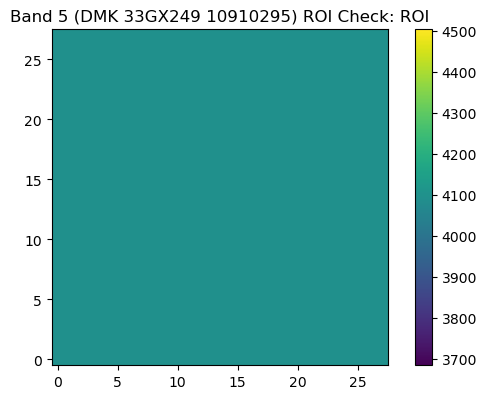

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1485.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.619057239057239 x 1485.0 = 3889.3
Exposure set to 0.005237999837845564 (err of 1.1488906600121834e-07
Trial 1:
Imaging with Exposure: 0.005237999837845564 s
+Good exposure 0.005237999837845564 Image recieved
Quantile: 3871.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.005237999837845564
Imaging with Exposure: 0.005237999837845564 s
+Good exposure 0.005237999837845564 Image recieved
x: 872
y: 624


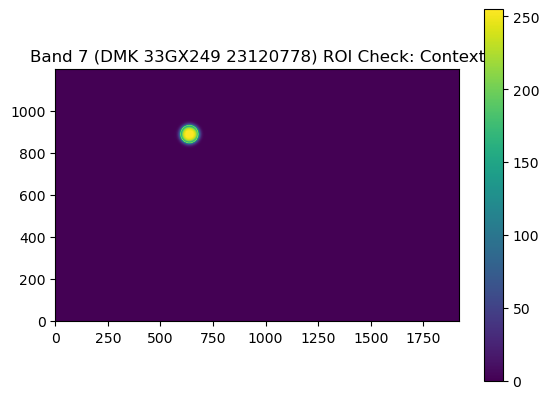

Imaging with Exposure: 0.005237999837845564 s
+Good exposure 0.005237999837845564 Image recieved


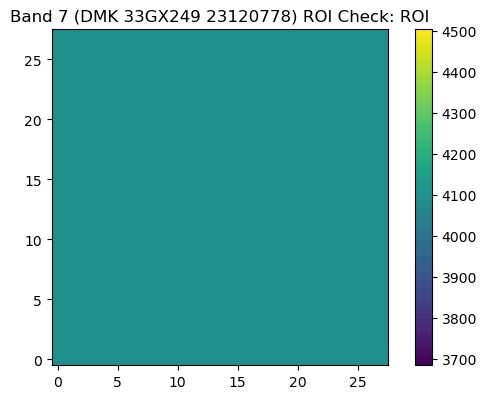

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 808.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Expected new quantile: 4.8134900990099005 x 808.0 = 3889.2999999999997
Exposure set to 0.009626000188291073 (err of 9.804669857515352e-07
Trial 1:
Imaging with Exposure: 0.009626000188291073 s
+Good exposure 0.009626000188291073 Image recieved
Quantile: 3851.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.009626000188291073
Imaging with Exposure: 0.009626000188291073 s
+Good exposure 0.009626000188291073 Image recieved
x: 248
y: 1240


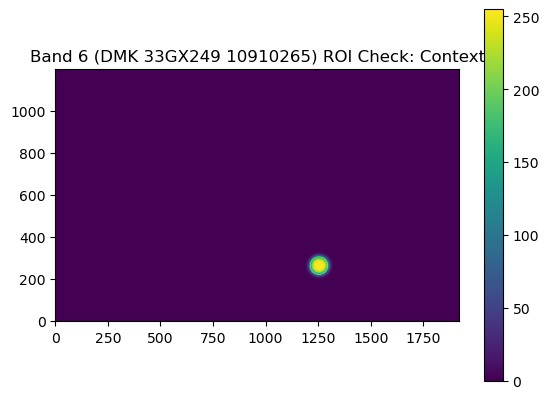

Imaging with Exposure: 0.009626000188291073 s
+Good exposure 0.009626000188291073 Image recieved


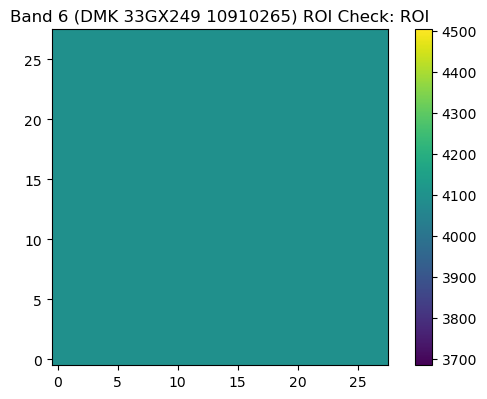

-----------------------------------


In [4]:
osc.find_camera_rois(cameras, roi_size=28)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 516.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 6.347286821705427 x 516.0 = 3275.2000000000003
Exposure set to 0.012694000266492367 (err of 5.739798783800654e-07
Trial 1:
Imaging with Exposure: 0.012694000266492367 s
+Good exposure 0.012694000266492367 Image recieved
Quantile: 3208.0, Target: 3275.2000000000003
Exposure current Value: 0.012694000266492367
Expected new quantile: 1.0209476309226932 x 3208.0 = 3275.2
Exposure set to 0.01295899972319603 (err of 9.097758113894155e-07
Trial 2:
Imaging with Exposure: 0.01295899972319603 s
+Good exposure 0.01295899972319603 Image recieved
Quantile: 3280.0, Target: 3275.2000000000003
Exposure current Value: 0.01295899972319603
Expected new quantile: 0.9985365853658538 x 3280.0

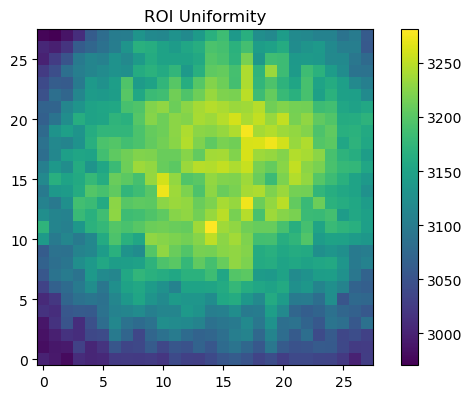

ROI Uniformity: 2.108522202454571 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 826.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 3.965133171912833 x 826.0 = 3275.2000000000003
Exposure set to 0.007930000312626362 (err of 2.6640786674435313e-07
Trial 1:
Imaging with Exposure: 0.007930000312626362 s
+Good exposure 0.007930000312626362 Image recieved
Quantile: 3258.0, Target: 3275.2000000000003
Exposure current Value: 0.007930000312626362
Expected new quantile: 1.005279312461633 x 3258.0 = 3275.2000000000003
Exposure set to 0.007970999926328659 (err of 8.653357689049346e-07
Trial 2:
Imaging with Exposure: 0.007970999926328659 s
+Good exposure 0.007970999926328659 Image recieved
Quantile: 3261.0, Target: 3275.2000000000003
Exposur

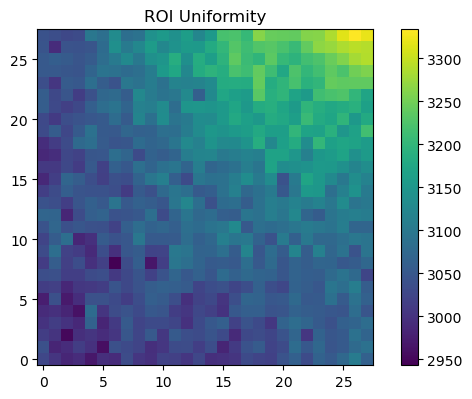

ROI Uniformity: 2.193902792709404 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 182.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 89.97802197802199 x 36.4 = 3275.2000000000003
Exposure set to 0.17995600402355194 (err of 4.847994547474421e-08
Trial 1:
Imaging with Exposure: 0.17995600402355194 s
+Good exposure 0.17995600402355194 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.17995600402355194
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.0287919994443655 (err of 9.611994028109472e-07
Trial 2:
Imaging with Exposure: 0.0287919994443655 s
+Good exposure 0.0287919994443655 Image recieved
Quantile: 2546.0, Target: 3275.2000000000003
Exposure current Value: 0.02879

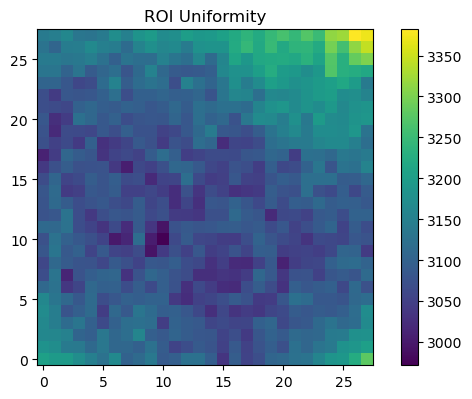

ROI Uniformity: 1.8157228417513065 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2674.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.224831712789828 x 2674.0 = 3275.2000000000003
Exposure set to 0.002449000021442771 (err of 6.635204896545538e-07
Trial 1:
Imaging with Exposure: 0.002449000021442771 s
+Good exposure 0.002449000021442771 Image recieved
Quantile: 3274.0, Target: 3275.2000000000003
Exposure current Value: 0.002449000021442771
Expected new quantile: 1.0003665241295052 x 3274.0 = 3275.2000000000003
Exposure set to 0.002449000021442771 (err of 8.976176010177736e-07
Trial 2:
Imaging with Exposure: 0.002449000021442771 s
+Good exposure 0.002449000021442771 Image recieved
Quantile: 3275.0, Target: 3275.2000000000003
Succ

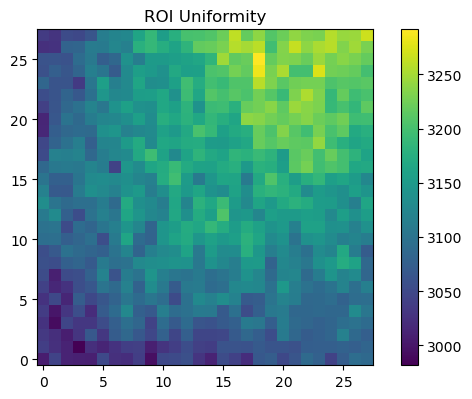

ROI Uniformity: 1.9157227776616506 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.00031999999191612005 (err of 2.3283064387071006e-11
Trial 1:
Imaging with Exposure: 0.00031999999191612005 s
+Good exposure 0.00031999999191612005 Image recieved
Quantile: 699.0, Target: 3275.2000000000003
Exposure current Value: 0.00031999999191612005
Expected new quantile: 4.685550786838341 x 699.0 = 3275.2000000000007
Exposure set to 0.0014990000054240227 (err of 3.762084868164182e-07
Trial 2:
Imaging with Exposure: 0.0014990000054240227 s
+Good exposure 0.0014990000054240227 Image recieved
Quantile: 3290.0, Target: 3275.2000000000003
Exposur

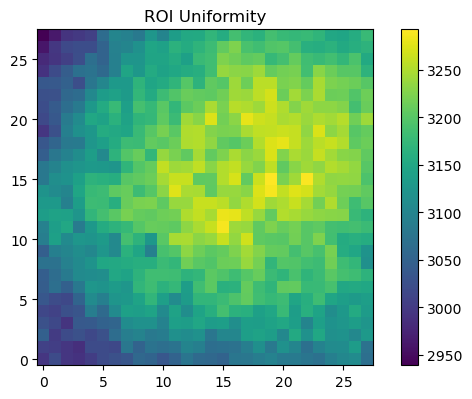

ROI Uniformity: 2.2539744587147914 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 104.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 157.46153846153848 x 20.8 = 3275.2000000000007
Exposure set to 0.3149229884147644 (err of 1.0346635609392862e-07
Trial 1:
Imaging with Exposure: 0.3149229884147644 s
+Good exposure 0.3149229884147644 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.3149229884147644
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.05038699880242348 (err of 6.793439388252942e-07
Trial 2:
Imaging with Exposure: 0.05038699880242348 s
+Good exposure 0.05038699880242348 Image recieved
Quantile: 2442.0, Target: 3275.2000000000003
Exposure current Value: 0.050

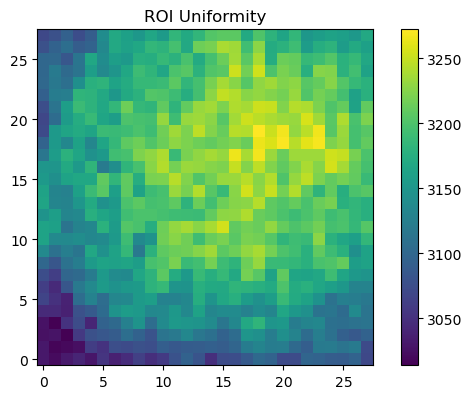

ROI Uniformity: 1.6904950090851378 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2497.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1.3116539847817381 x 2497.0 = 3275.2000000000003
Exposure set to 0.0026229999493807554 (err of 3.0814478316340196e-07
Trial 1:
Imaging with Exposure: 0.0026229999493807554 s
+Good exposure 0.0026229999493807554 Image recieved
Quantile: 3255.0, Target: 3275.2000000000003
Exposure current Value: 0.0026229999493807554
Expected new quantile: 1.0062058371735791 x 3255.0 = 3275.2000000000003
Exposure set to 0.0026390000712126493 (err of 2.7778876026925484e-07
Trial 2:
Imaging with Exposure: 0.0026390000712126493 s
+Good exposure 0.0026390000712126493 Image recieved
Quantile: 3285.0, Target: 3275.20000000

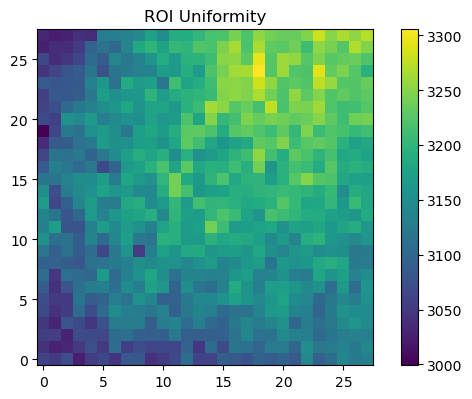

ROI Uniformity: 1.796782981399748 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1311.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 2.498245614035088 x 1311.0 = 3275.2000000000003
Exposure set to 0.0049959998577833176 (err of 4.916076074574366e-07
Trial 1:
Imaging with Exposure: 0.0049959998577833176 s
+Good exposure 0.0049959998577833176 Image recieved
Quantile: 3228.0, Target: 3275.2000000000003
Exposure current Value: 0.0049959998577833176
Expected new quantile: 1.0146220570012392 x 3228.0 = 3275.2000000000003
Exposure set to 0.00506900018081069 (err of 5.147167131836633e-08
Trial 2:
Imaging with Exposure: 0.00506900018081069 s
+Good exposure 0.00506900018081069 Image recieved
Quantile: 3273.0, Target: 3275.2000000000003
Expo

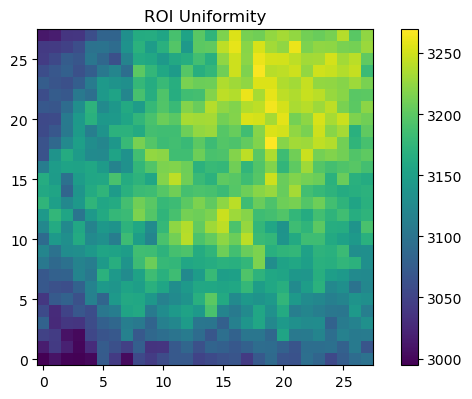

ROI Uniformity: 1.8690452193862575 %
-----------------------------------


In [5]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [6]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        # sleep(0.5)
        img_2 = camera.image_capture(roi=True)
        # sleep(0.5)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots, 'cmd exposure': cmd_exposures})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'], label='Ret.')
    ax[0].plot(results['cmd exposure'], results['raw mean'], label='Cmd.')
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\0_850\850_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

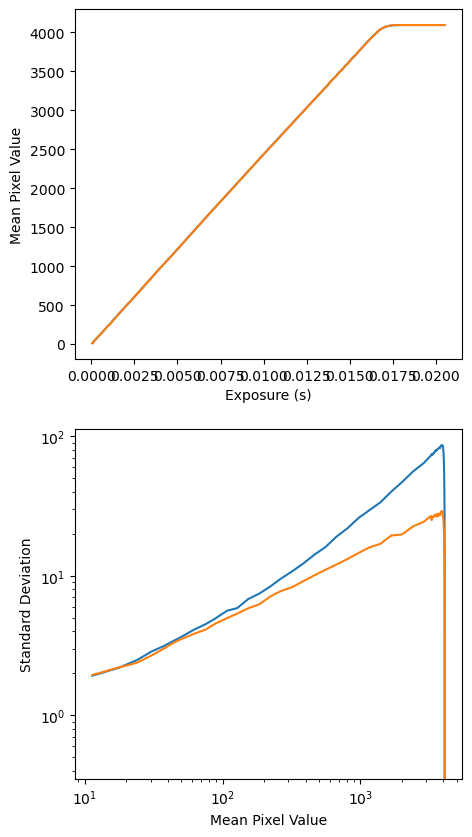

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\1_475\475_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

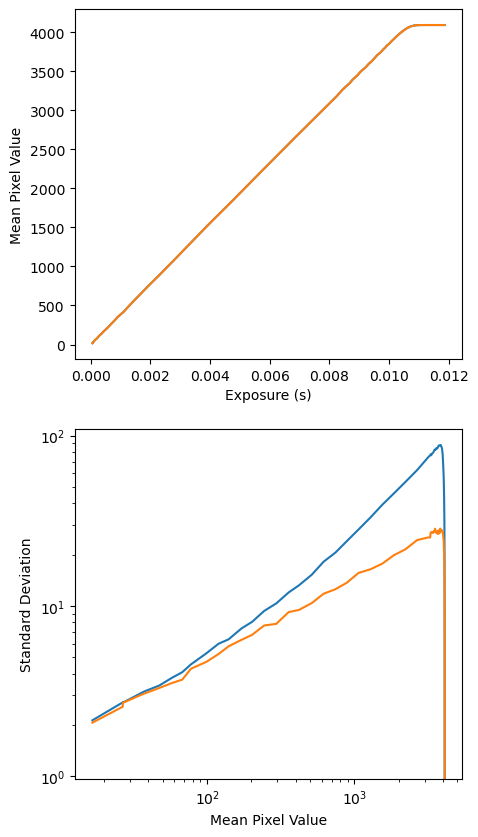

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\2_400\400_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

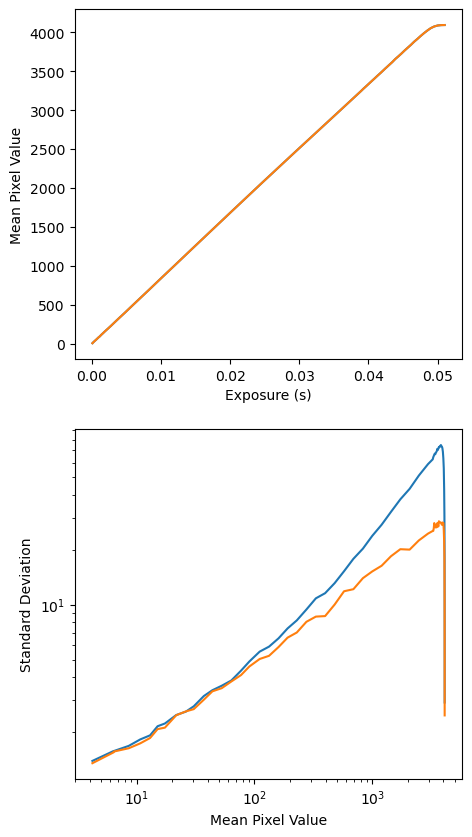

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\3_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

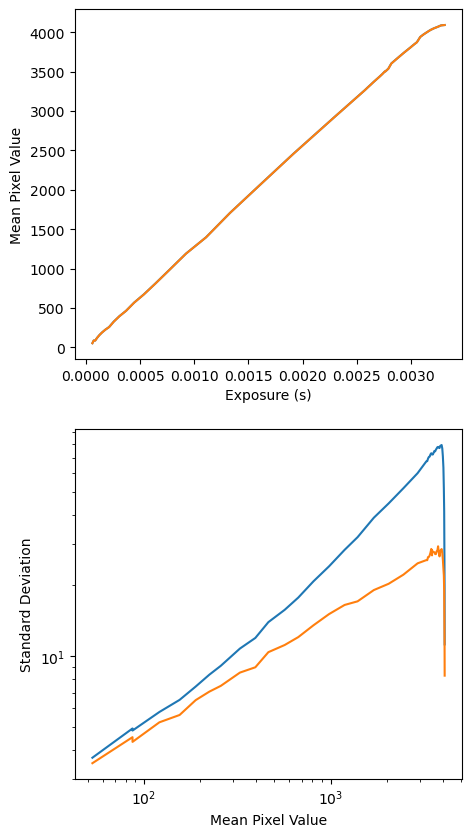

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\4_725\725_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

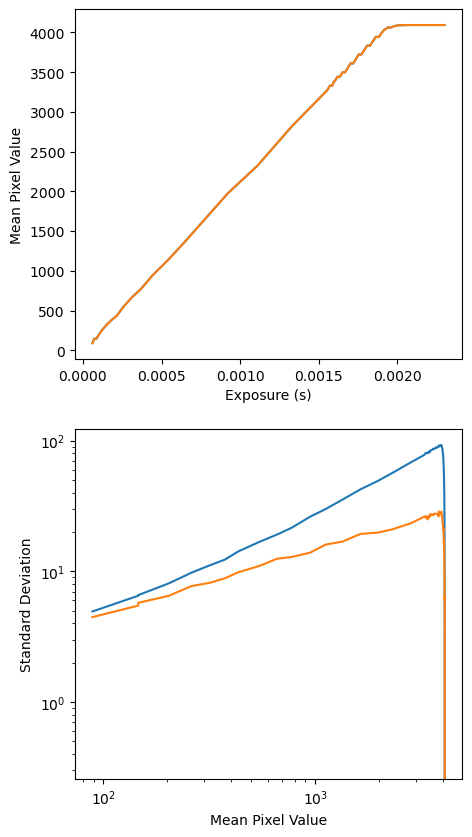

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\5_950\950_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

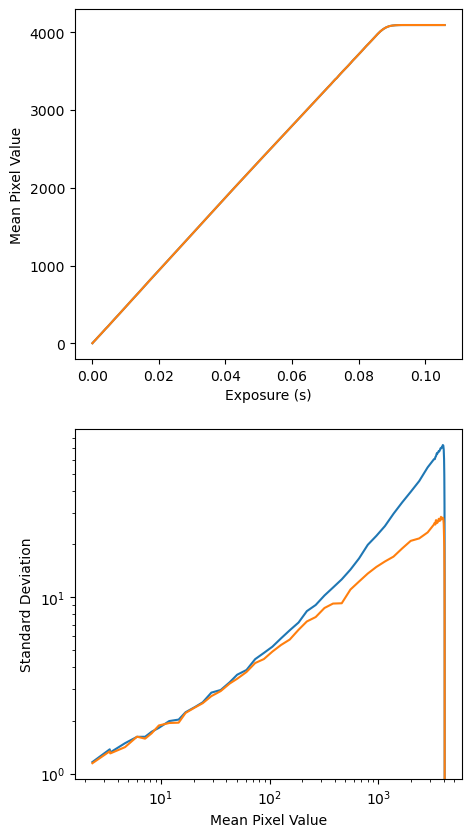

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\7_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

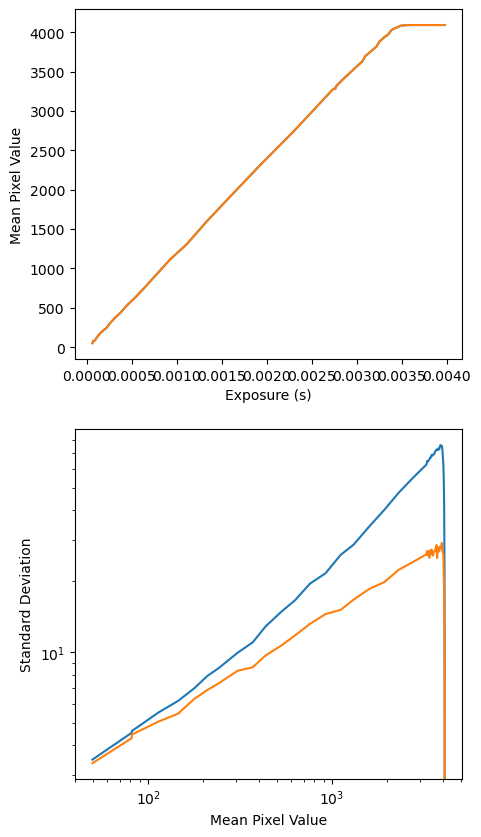

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_280623\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_280623\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_280623\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99_280623\6_650\650_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-

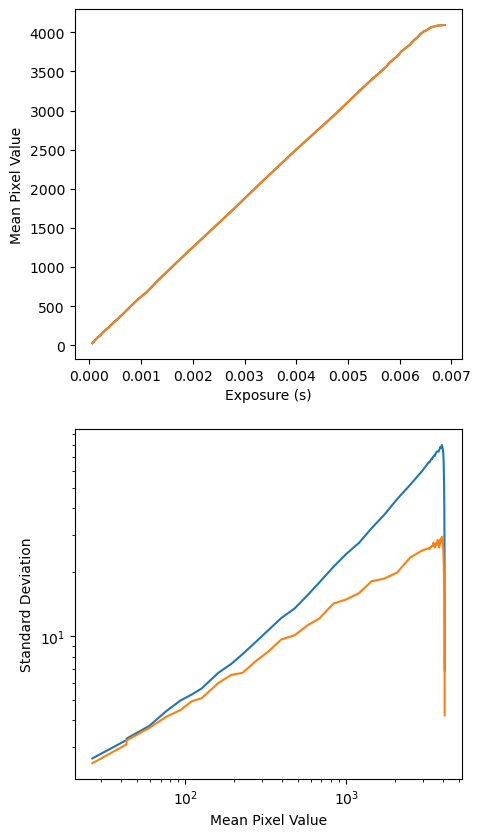

In [7]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99_280623')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 35.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 467.8857142857143 x 7.0 = 3275.2000000000003
Exposure set to 0.9357709884643555 (err of 4.845538309483644e-07
Trial 1:
Imaging with Exposure: 0.9357709884643555 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.9357709884643555 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.9357709884643555
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.14972299337387085 (err of 3.6478042603205196e-07
Trial 2:
Imaging with Exposure: 0.14972299337387085 s
+Good exposure 0.14972299337387085 I

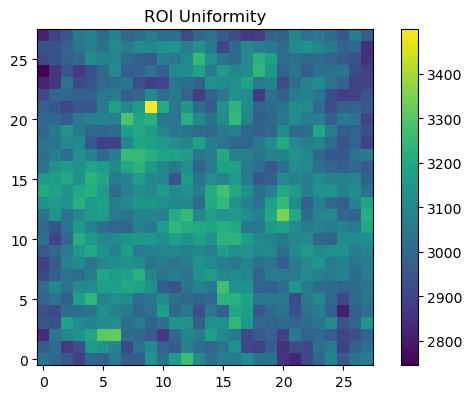

ROI Uniformity: 2.97752637897544 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 47.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 348.4255319148936 x 9.4 = 3275.2000000000003
Exposure set to 0.6968510150909424 (err of 8.183749433676724e-08
Trial 1:
Imaging with Exposure: 0.6968510150909424 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.6968510150909424 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.6968510150909424
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.11149600148200989 (err of 1.6093254089077913e-07
Trial 2:
Imaging wi

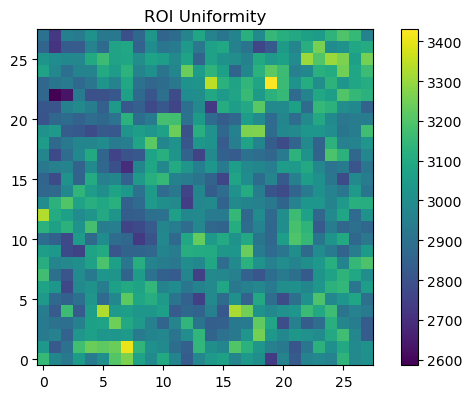

ROI Uniformity: 4.014724398504616 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 13.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1259.6923076923078 x 2.6 = 3275.2000000000007
Exposure set to 2.5193839073181152 (err of 8.27730848751429e-07
Trial 1:
Imaging with Exposure: 2.5193839073181152 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 2.5193839073181152 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 2.5193839073181152
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.40310099720954895 (err of 4.279613494695411e-07
Trial 2:
Imaging wi

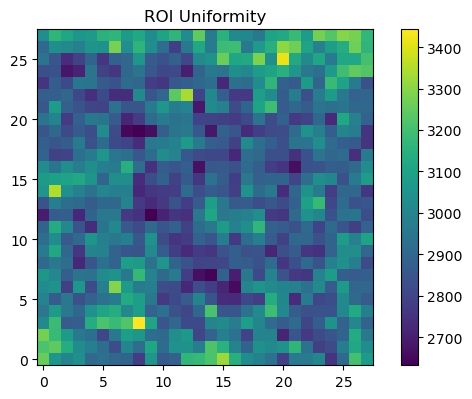

ROI Uniformity: 4.561969659571349 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 146.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 112.16438356164385 x 29.2 = 3275.2000000000003
Exposure set to 0.22432799637317657 (err of 7.814051558030499e-07
Trial 1:
Imaging with Exposure: 0.22432799637317657 s
+Good exposure 0.22432799637317657 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.22432799637317657
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.035891998559236526 (err of 4.808604717257414e-07
Trial 2:
Imaging with Exposure: 0.035891998559236526 s
+Good exposure 0.035891998559236526 Image recieved
Quantile: 2550.0, Target: 3275.2000000000003
Exposure current Value: 

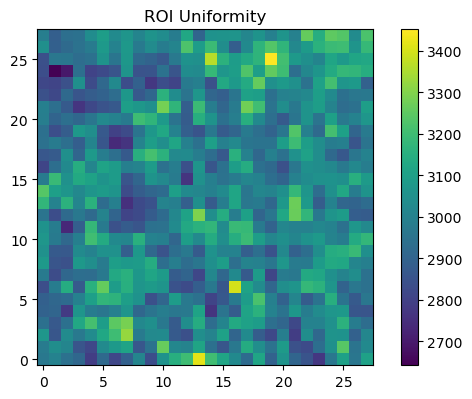

ROI Uniformity: 3.785803592717695 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 261.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 62.74329501915709 x 52.2 = 3275.2000000000003
Exposure set to 0.12548600137233734 (err of 5.946262700284866e-07
Trial 1:
Imaging with Exposure: 0.12548600137233734 s
+Good exposure 0.12548600137233734 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.12548600137233734
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.020076999440789223 (err of 7.607787847509206e-07
Trial 2:
Imaging with Exposure: 0.020076999440789223 s
+Good exposure 0.020076999440789223 Image recieved
Quantile: 2578.0, Target: 3275.2000000000003
Exposure current Value: 0

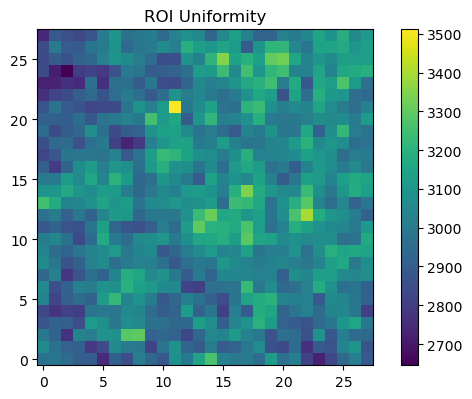

ROI Uniformity: 3.786799139064498 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 9.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 1819.5555555555557 x 1.8 = 3275.2000000000003
Exposure set to 3.639111042022705 (err of 2.4193690917329036e-07
Trial 1:
Imaging with Exposure: 3.639111042022705 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 3.639111042022705 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 3.639111042022705
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.5822569727897644 (err of 7.939338684259667e-07
Trial 2:
Imaging with E

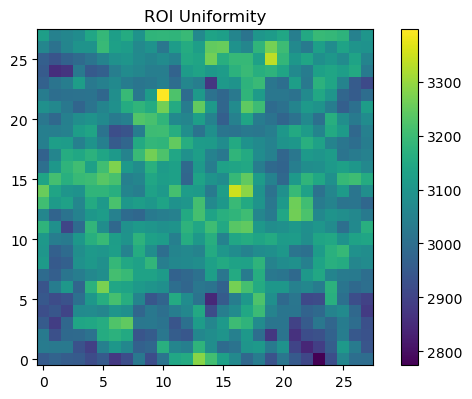

ROI Uniformity: 2.7750736835183623 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 137.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 119.53284671532849 x 27.4 = 3275.2000000000003
Exposure set to 0.2390650063753128 (err of 6.984103552987175e-07
Trial 1:
Imaging with Exposure: 0.2390650063753128 s
+Good exposure 0.2390650063753128 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.2390650063753128
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.03824999928474426 (err of 4.017353057855777e-07
Trial 2:
Imaging with Exposure: 0.03824999928474426 s
+Good exposure 0.03824999928474426 Image recieved
Quantile: 2555.0, Target: 3275.2000000000003
Exposure current Value: 0.0382

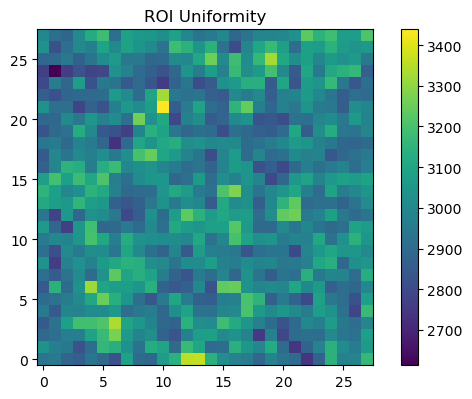

ROI Uniformity: 3.6676106007213622 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 77.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Expected new quantile: 212.67532467532467 x 15.4 = 3275.2000000000003
Exposure set to 0.42535001039505005 (err of 6.591586710347208e-07
Trial 1:
Imaging with Exposure: 0.42535001039505005 s
+Good exposure 0.42535001039505005 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.42535001039505005
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.06805600225925446 (err of -5.960464483090178e-10
Trial 2:
Imaging with Exposure: 0.06805600225925446 s
+Good exposure 0.06805600225925446 Image recieved
Quantile: 2510.0, Target: 3275.2000000000003
Exposure current Value: 0.

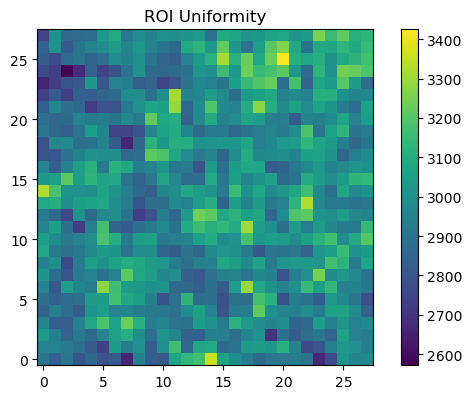

ROI Uniformity: 3.9820512411195206 %
-----------------------------------


In [8]:
osc.check_channel_roi_uniformity(cameras)

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\0_850\850_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

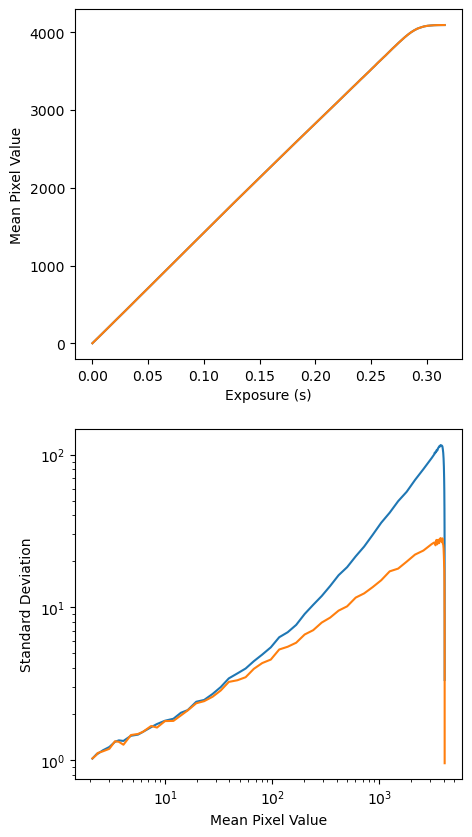

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\1_475\475_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

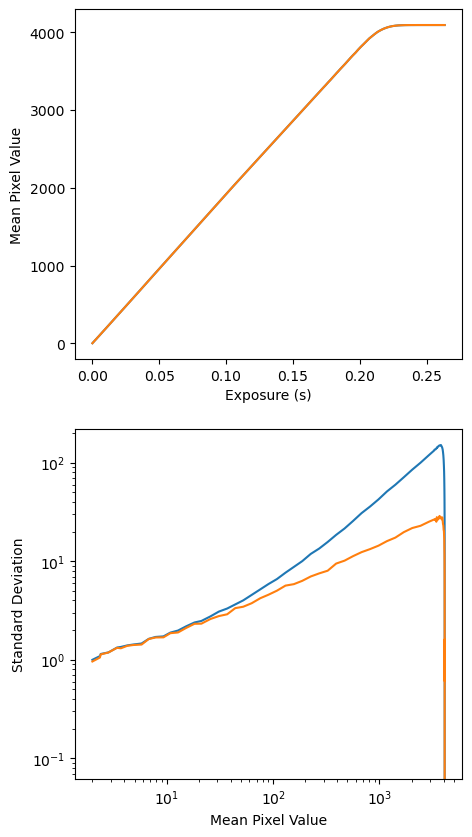

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\2_400\400_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

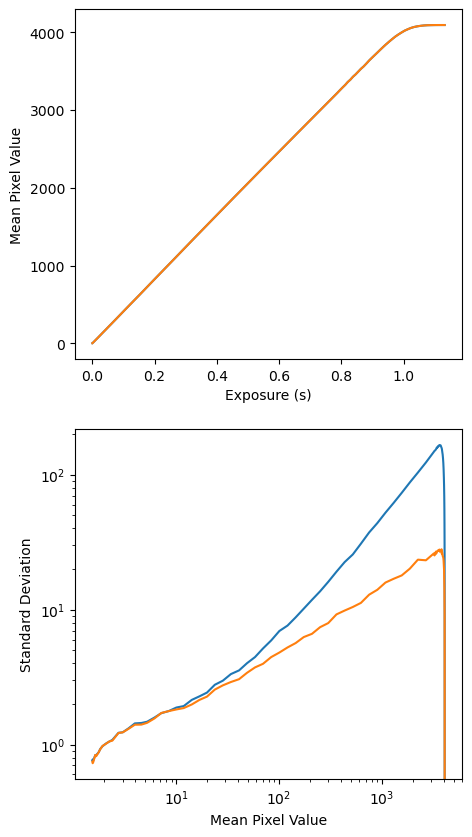

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\3_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

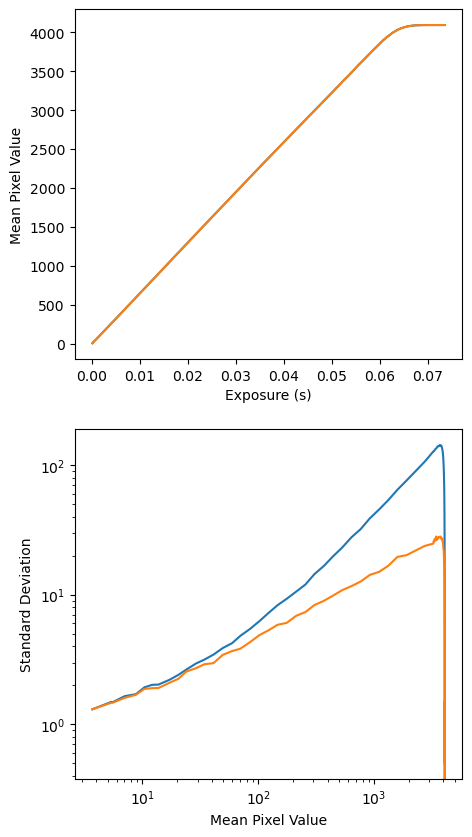

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\4_725\725_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

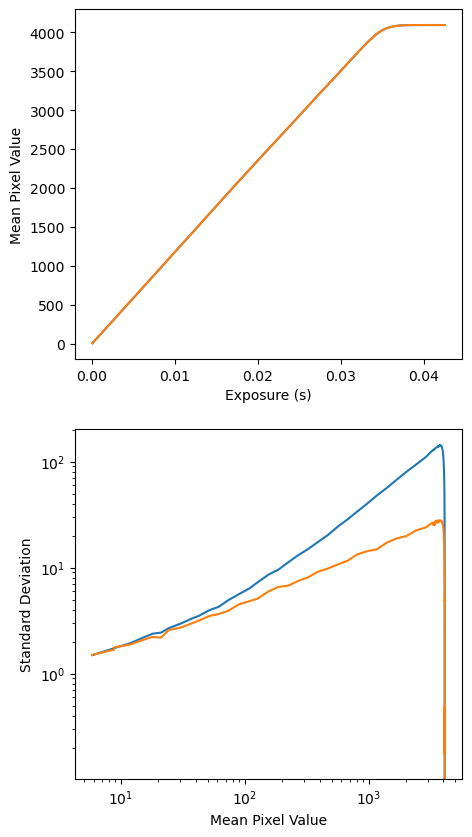

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\5_950\950_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

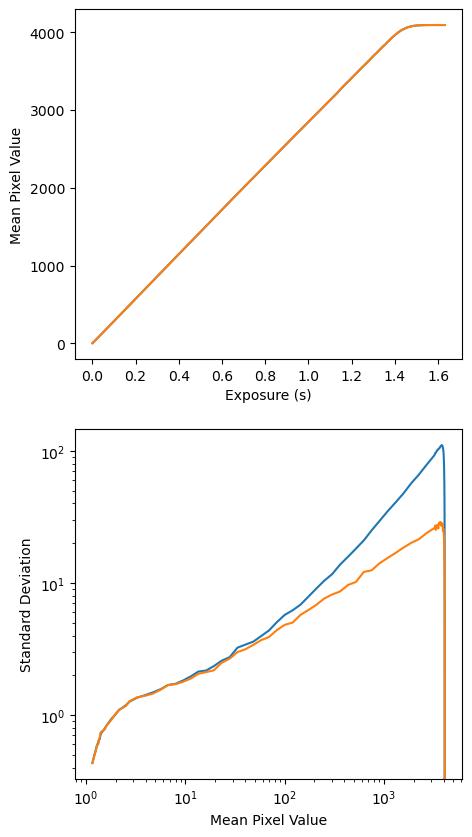

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\7_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

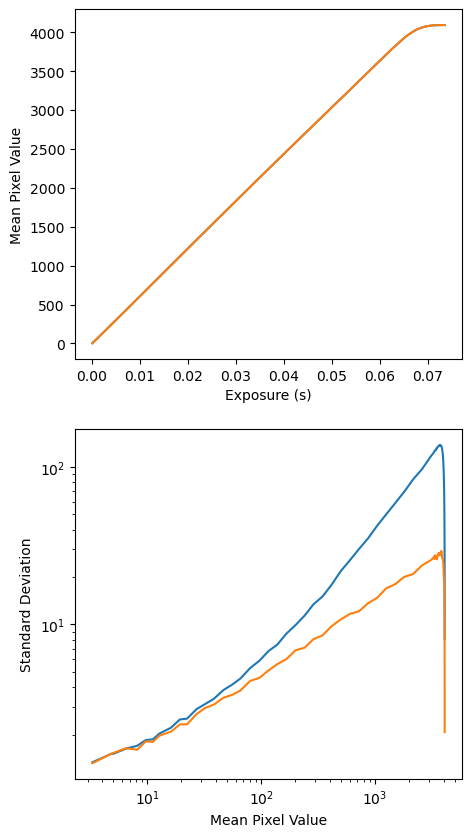

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_280623\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_280623\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_280623\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5_280623\6_650\650_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

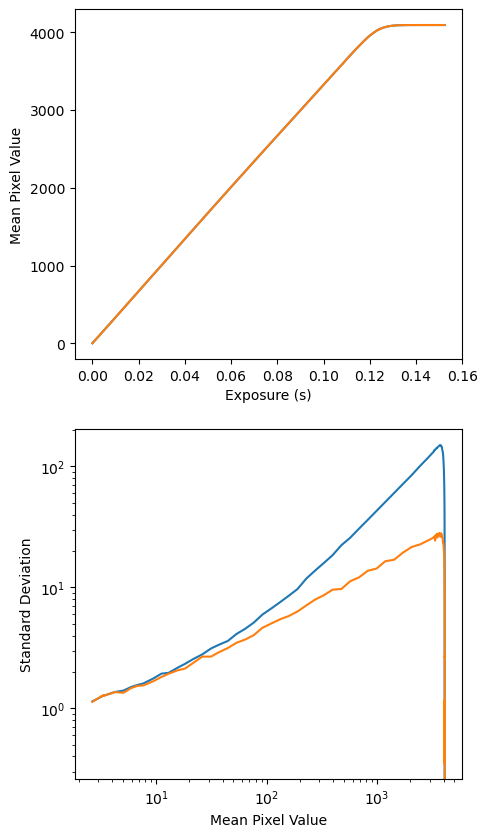

In [9]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5_280623')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\0_850\850_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

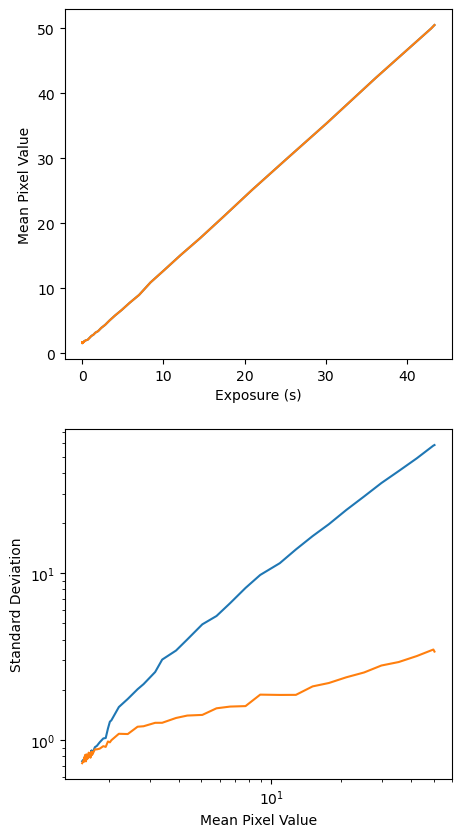

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\1_475\475_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

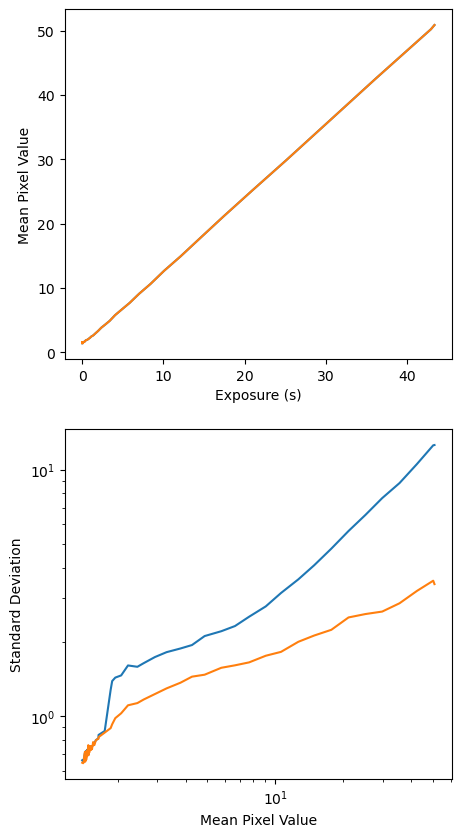

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\2_400\400_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

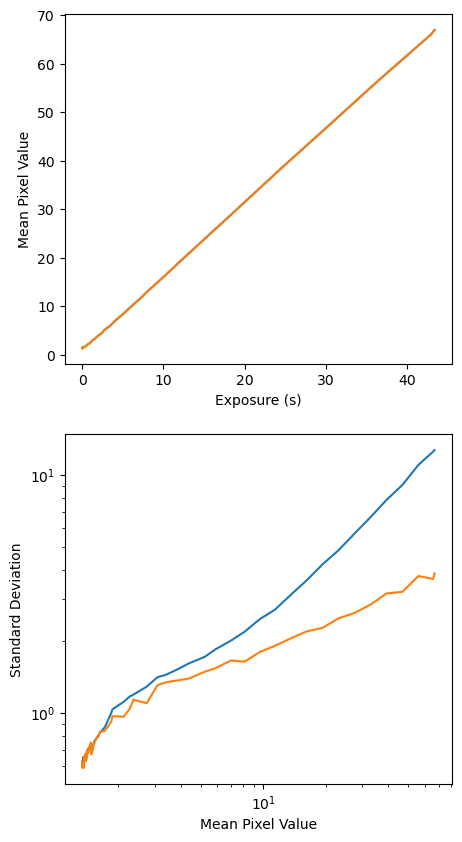

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\3_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

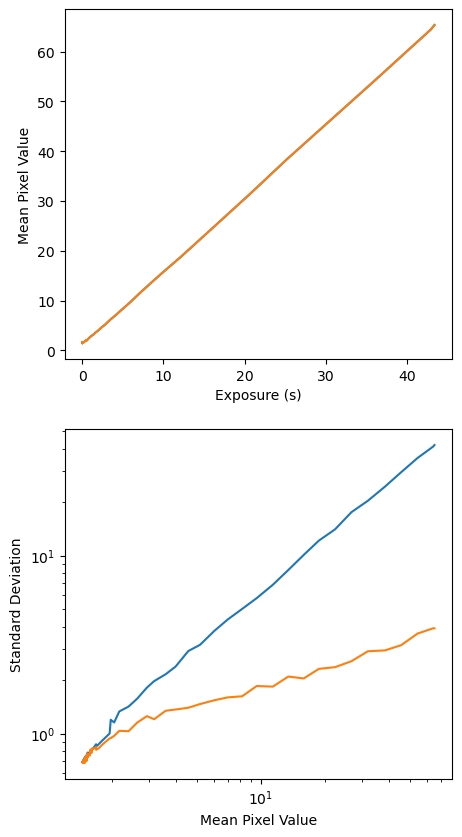

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\4_725\725_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

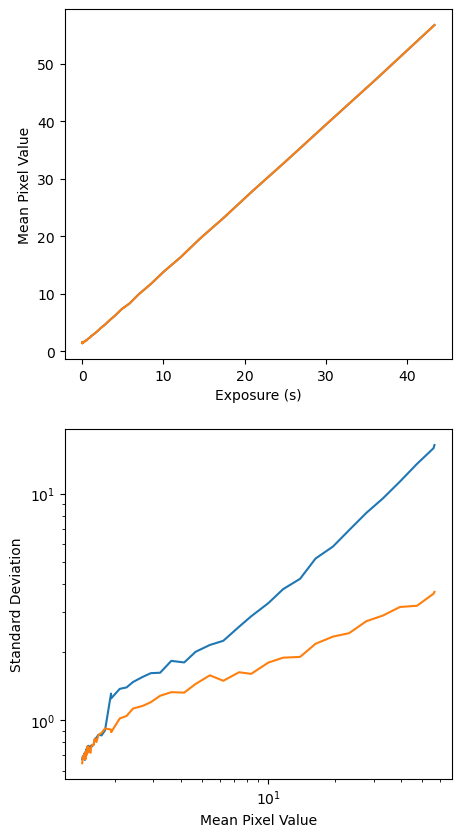

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\5_950\950_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

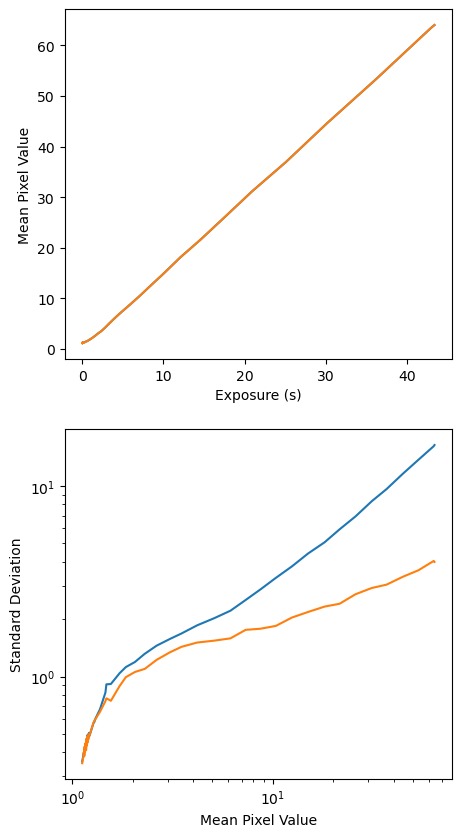

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\7_550\550_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

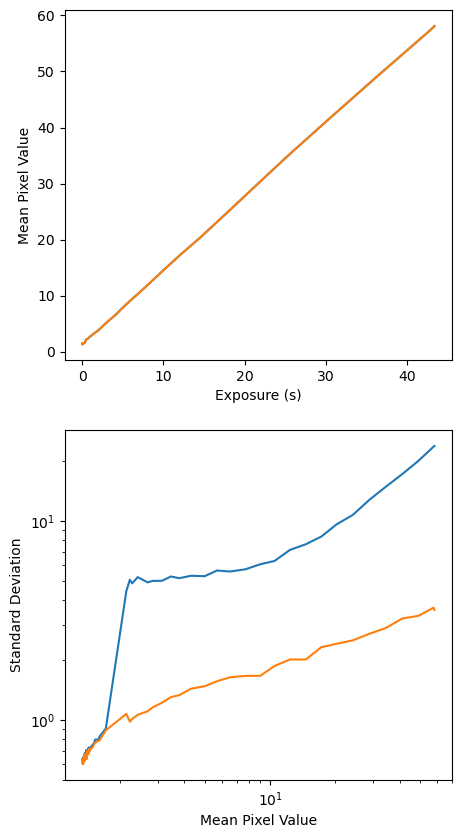

Exposure: 0.0000600 s
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_280623\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_280623\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_280623\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\dark_280623\6_650\650_72us_2_calibration.tif
Exposure: 0.0000864 s
Imaging with Exposure: 8.600000001024455e-05 s

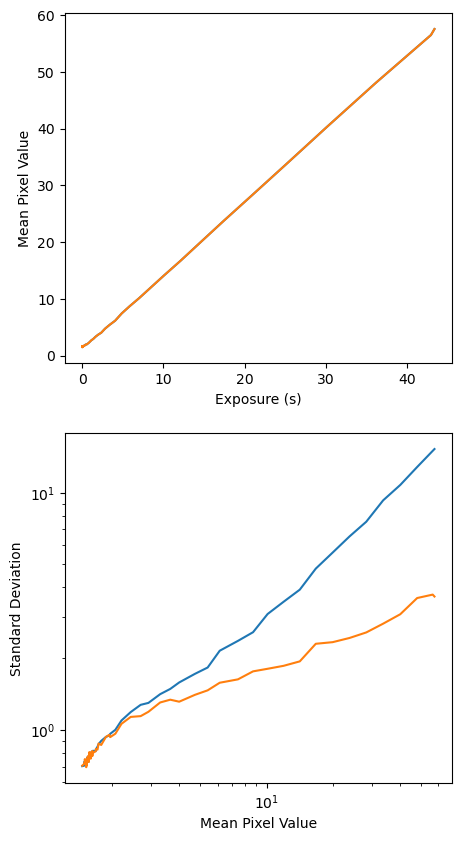

In [10]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_280623')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [11]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99_280623', 'drk', drk_ave)

Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging wi

In [12]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5_280623', 'drk', drk_ave)

Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging wi